# FC autoencoder for MNIST

My first experiment with autoencoders: a small network with fully connected layers to autoencode the MNIST data

## Imports

In [1]:
from fastai.vision.all import *

## Load data

In [15]:
path = untar_data(URLs.MNIST_TINY)

In [16]:
path/'training'

Path('/Users/bauville/.fastai/data/mnist_tiny/training')

In [21]:
mean = 33.31
std = 78.56748962402344

def label_func(o):
    img = image2tensor(Image.open(o)).view(1,784).float()
    # print(img.dtype)
    # img -= mean
    # img /= std
    img /= 255.0
    return img

dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), RegressionBlock),
                   get_items=get_image_files, 
                   # splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                   splitter=GrandparentSplitter(),
                   item_tfms=[Resize([1,784])],
                   get_y=label_func)

dls = dblock.dataloaders(path)


In [22]:
# dls.show_batch(max_n=9, figsize=(4,4))

## Create architecture

In [23]:
class AE(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
        )

        self.decoder = nn.Sequential(
            nn.Linear(9,18),
            nn.ReLU(),
            nn.Linear(18,36),
            nn.ReLU(),
            nn.Linear(36,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,784),
            # nn.ReLU(),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        # x -= mean
        # x /= std
        x /= 255
        # print(x.shape)
        # return 0
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create Learner

In [24]:
learn = Learner(dls, AE(), loss_func=MSELossFlat())

In [29]:
# learn.lr_find()
learn.fit(5, lr=0.002)

epoch,train_loss,valid_loss,time
0,0.061680,0.064087,00:00
1,0.061494,0.063511,00:00
2,0.061261,0.063184,00:00
3,0.061122,0.063221,00:00
4,0.061022,0.063113,00:00


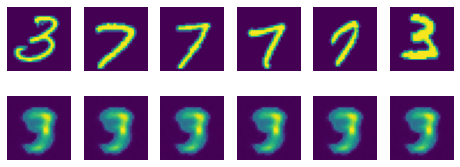

In [26]:
import torchvision.transforms as T
transform = T.ToPILImage()
b = dls.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)
n = 6
fig, ax = plt.subplots(2,n, figsize= [8,3])
for i in range(n):
    # s = torch.randint(0,64,[]).item()
    s = i
    plt.axes(ax[0,i])
    plt.imshow(transform(b[1][s,:].view(28,28)))
    plt.axis('off')
    plt.axes(ax[1,i])
    plt.imshow(transform(preds[s,:].view(28,28)))
    plt.axis('off')


In [27]:
learn.model.encoder(b[1])

/Users/bauville/opt/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1658300888192/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


tensor([[[ 0.0799, -0.0658,  0.3649,  0.3005,  0.1797, -0.4379, -0.0329,
          -0.2313,  0.3240]],

        [[ 0.0810, -0.0631,  0.3851,  0.3256,  0.2076, -0.4625, -0.0550,
          -0.2288,  0.3340]],

        [[ 0.0825, -0.0619,  0.3774,  0.3187,  0.1993, -0.4592, -0.0495,
          -0.2308,  0.3338]],

        [[ 0.0802, -0.0640,  0.3768,  0.3211,  0.2020, -0.4605, -0.0501,
          -0.2276,  0.3342]],

        [[ 0.0811, -0.0636,  0.3758,  0.3151,  0.1941, -0.4534, -0.0450,
          -0.2302,  0.3315]],

        [[ 0.0682, -0.0603,  0.3912,  0.3384,  0.2034, -0.4695, -0.0594,
          -0.2312,  0.3440]],

        [[ 0.0746, -0.0617,  0.3814,  0.3255,  0.1981, -0.4593, -0.0525,
          -0.2312,  0.3351]],

        [[ 0.0813, -0.0643,  0.3765,  0.3164,  0.1984, -0.4554, -0.0468,
          -0.2289,  0.3315]],

        [[ 0.0750, -0.0618,  0.3710,  0.3105,  0.1843, -0.4476, -0.0408,
          -0.2343,  0.3312]],

        [[ 0.0798, -0.0642,  0.3768,  0.3207,  0.2017, -0.4592, 

tensor(False, device='mps:0')